<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-04 02:33:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.3MB/s    in 2.5s    

2025-04-04 02:34:00 (61.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



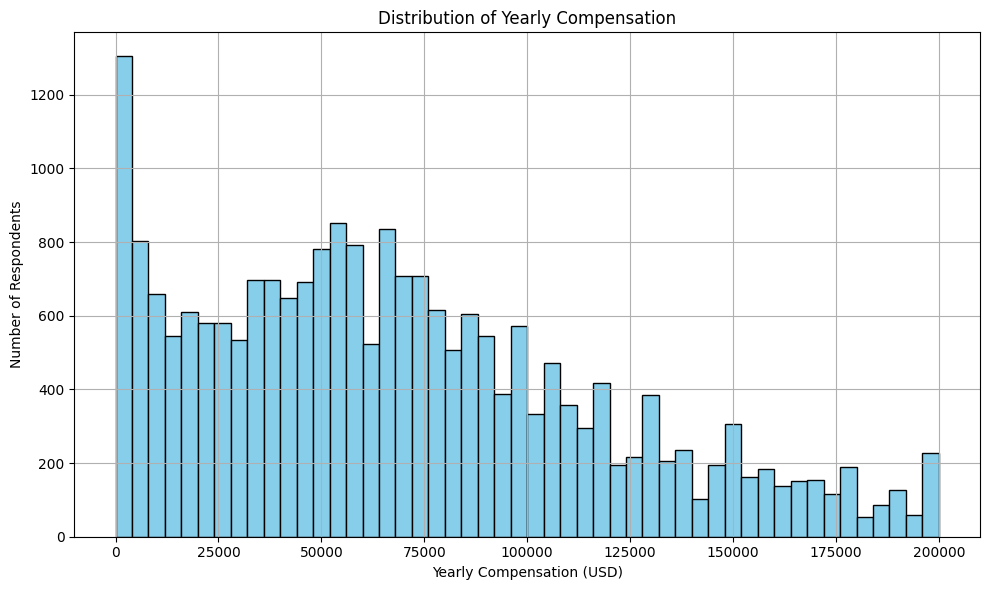

In [4]:
# 必要なカラムを抽出して欠損を除去
df_hist = df[['ConvertedCompYearly']].dropna()
df_hist['ConvertedCompYearly'] = pd.to_numeric(df_hist['ConvertedCompYearly'], errors='coerce')
df_hist = df_hist.dropna()

# 上限を設定（例：20万ドル以下に限定）して可視化
plt.figure(figsize=(10, 6))
plt.hist(df_hist[df_hist['ConvertedCompYearly'] <= 200000]['ConvertedCompYearly'],
         bins=50, color='skyblue', edgecolor='black')

# グラフ装飾
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



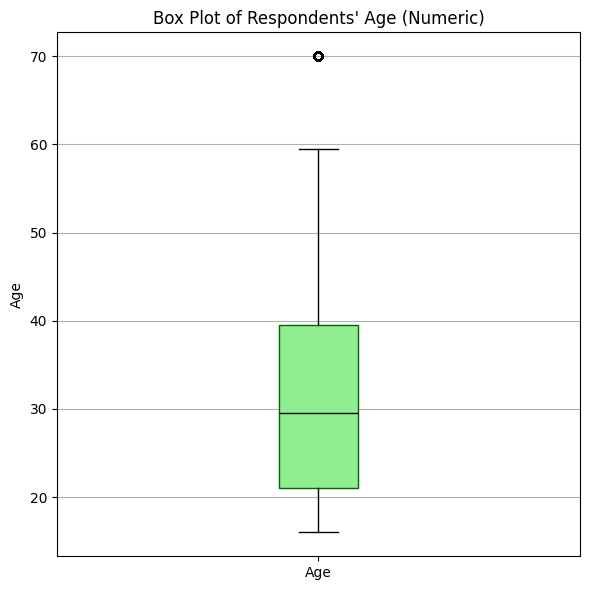

In [5]:
# 必要なカラムを抽出して欠損を除去
df_age = df[['Age']].dropna()

# 年齢カテゴリ → 数値（中央値）の辞書を定義
age_numeric_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# 数値に変換（該当しないものは除外される）
df_age['AgeNumeric'] = df_age['Age'].map(age_numeric_map)
df_age = df_age.dropna()

# 箱ひげ図を描画
plt.figure(figsize=(6, 6))
plt.boxplot(df_age['AgeNumeric'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='darkgreen'),
            medianprops=dict(color='black'))

# 装飾
plt.title('Box Plot of Respondents\' Age (Numeric)')
plt.ylabel('Age')
plt.xticks([1], ['Age'])  # 1箱だけなのでラベルは1つ
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



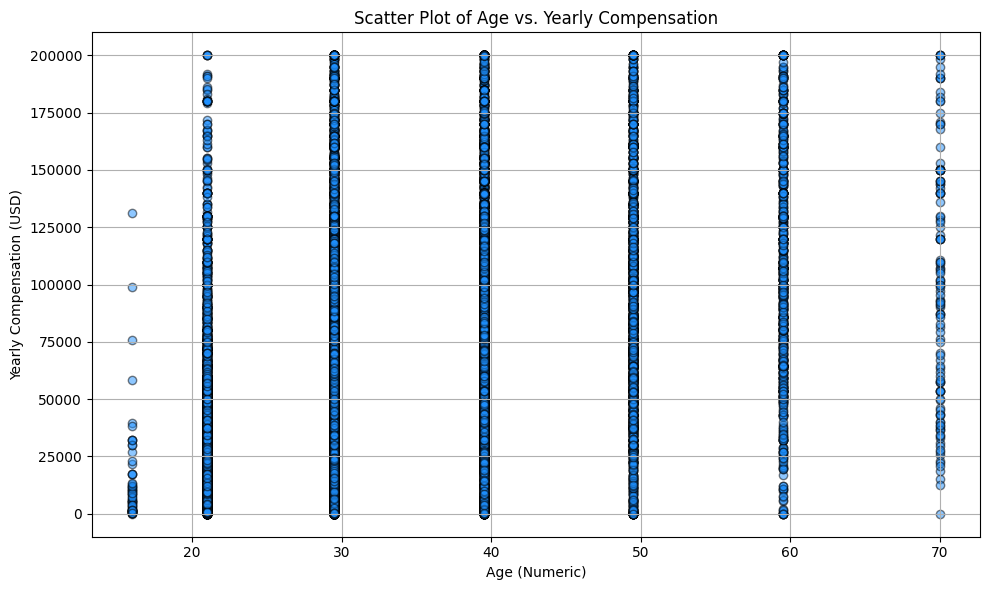

In [6]:
# 必要なカラムを抽出し、マッピングを適用して Age を数値化
df_scatter = df[['Age', 'ConvertedCompYearly']].dropna()

age_numeric_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df_scatter['AgeNumeric'] = df_scatter['Age'].map(age_numeric_map)
df_scatter['ConvertedCompYearly'] = pd.to_numeric(df_scatter['ConvertedCompYearly'], errors='coerce')
df_scatter = df_scatter.dropna()

# 年収に上限（例：200,000）をつけて極端な外れ値を除外
df_scatter = df_scatter[df_scatter['ConvertedCompYearly'] <= 200000]

# 散布図の描画
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['AgeNumeric'], df_scatter['ConvertedCompYearly'],
            alpha=0.5, color='dodgerblue', edgecolor='k')

# グラフ装飾
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Numeric)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


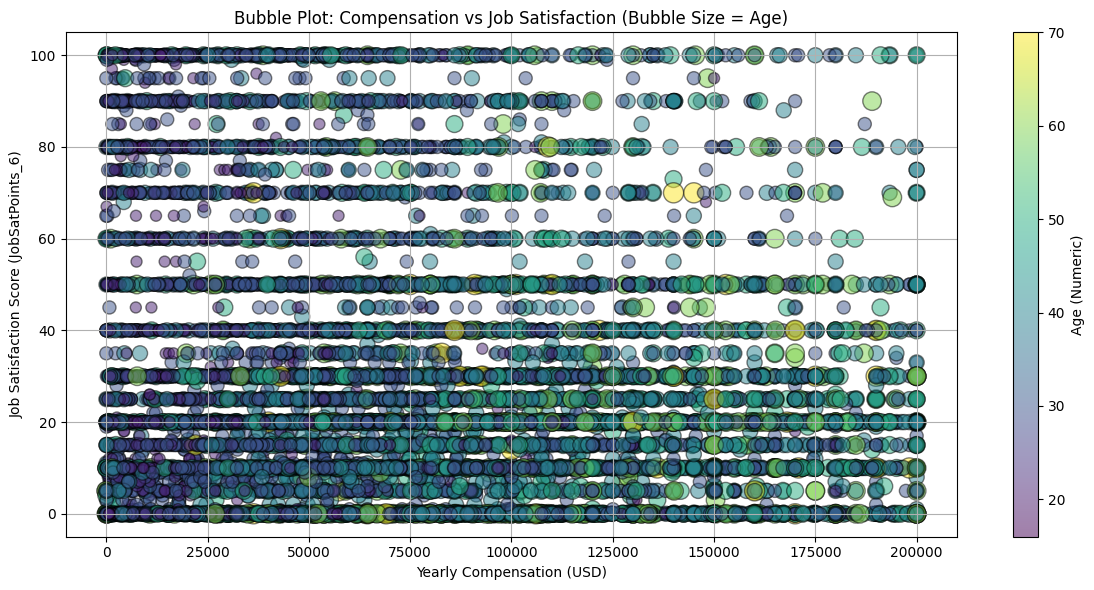

In [7]:
# 必要なカラムを抽出して前処理
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()

# Age を数値化（中央値ベース）
age_numeric_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df_bubble['AgeNumeric'] = df_bubble['Age'].map(age_numeric_map)

# 数値変換・欠損除去
df_bubble['ConvertedCompYearly'] = pd.to_numeric(df_bubble['ConvertedCompYearly'], errors='coerce')
df_bubble['JobSatPoints_6'] = pd.to_numeric(df_bubble['JobSatPoints_6'], errors='coerce')
df_bubble = df_bubble.dropna()

# 外れ値を制限（例：年収が200,000以下）
df_bubble = df_bubble[df_bubble['ConvertedCompYearly'] <= 200000]

# バブルプロットの描画
plt.figure(figsize=(12, 6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['AgeNumeric'] * 3,  # バブルサイズを調整
    alpha=0.5,
    c=df_bubble['AgeNumeric'],
    cmap='viridis',
    edgecolors='k'
)

# グラフ装飾
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.colorbar(label='Age (Numeric)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



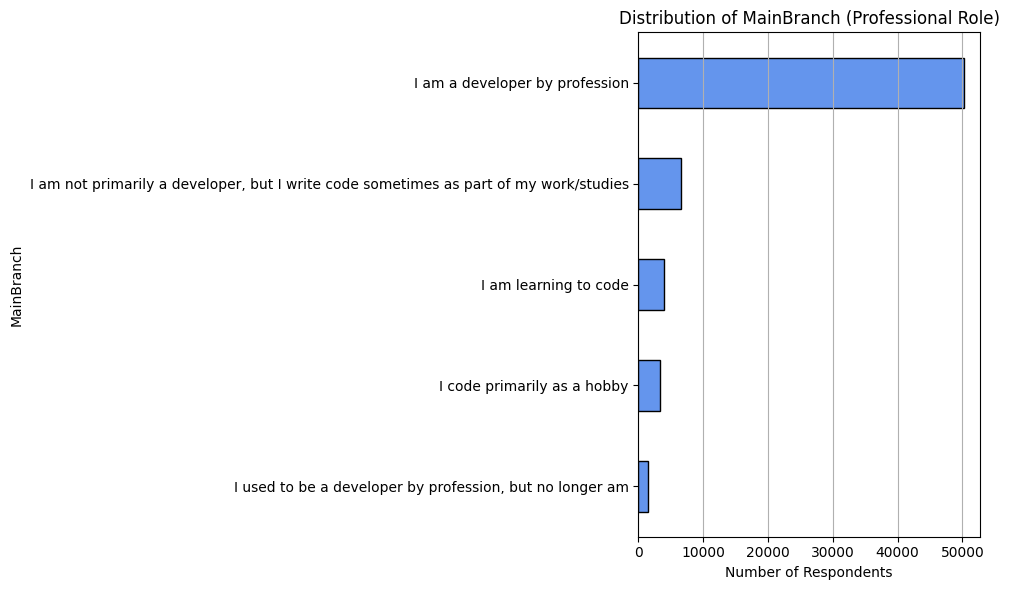

In [8]:
# 欠損を除去して集計
df_branch = df[['MainBranch']].dropna()
branch_counts = df_branch['MainBranch'].value_counts().sort_values()

# 横棒グラフの描画
plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', color='cornflowerblue', edgecolor='black')

# グラフ装飾
plt.title('Distribution of MainBranch (Professional Role)')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.tight_layout()
plt.grid(axis='x')
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



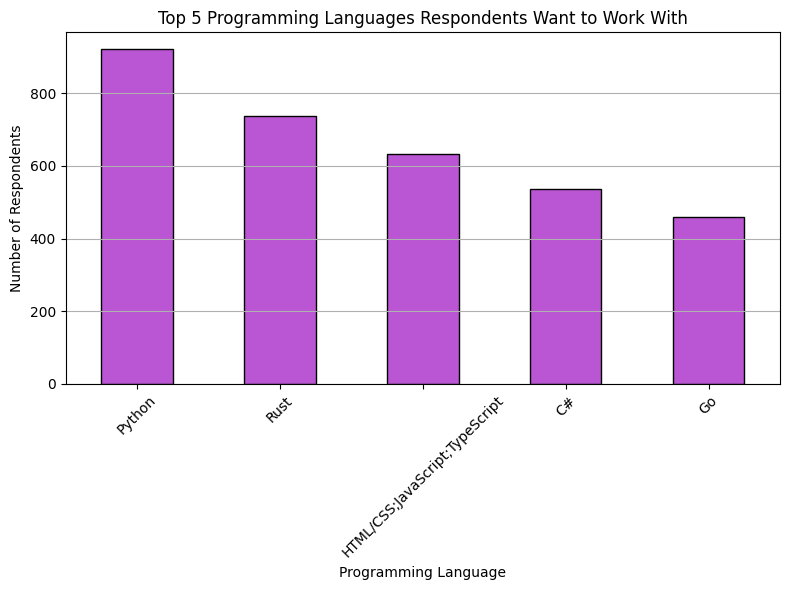

In [9]:
# 欠損除去と言語の分割・展開
df_lang_want = df[['LanguageWantToWorkWith']].dropna()
df_lang_want['Language'] = df_lang_want['LanguageWantToWorkWith'].str.split(',')
df_lang_want = df_lang_want.explode('Language')
df_lang_want['Language'] = df_lang_want['Language'].str.strip()

# 上位5言語を抽出
top5 = df_lang_want['Language'].value_counts().head(5)

# 縦棒グラフの描画
plt.figure(figsize=(8, 6))
top5.plot(kind='bar', color='mediumorchid', edgecolor='black')

# グラフ装飾
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_896/1818851658.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_sat.groupby('Age').agg({


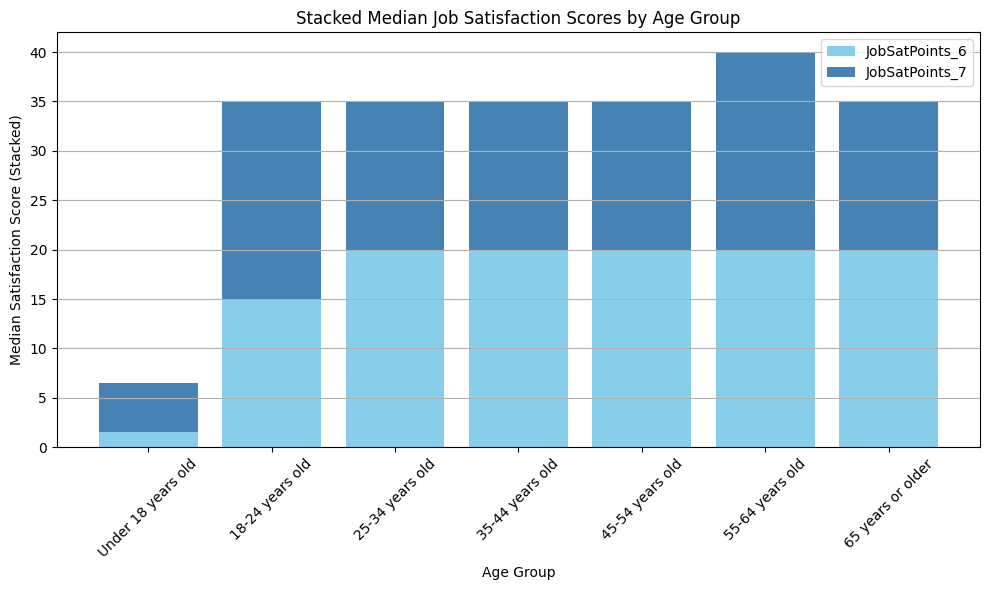

In [10]:
# 必要なカラムと欠損除去
df_sat = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# 年齢カテゴリの順序を指定
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_sat = df_sat[df_sat['Age'].isin(age_order)]
df_sat['Age'] = pd.Categorical(df_sat['Age'], categories=age_order, ordered=True)

# 数値変換と欠損除去
df_sat['JobSatPoints_6'] = pd.to_numeric(df_sat['JobSatPoints_6'], errors='coerce')
df_sat['JobSatPoints_7'] = pd.to_numeric(df_sat['JobSatPoints_7'], errors='coerce')
df_sat = df_sat.dropna()

# 年齢層ごとの中央値を計算
grouped = df_sat.groupby('Age').agg({
    'JobSatPoints_6': 'median',
    'JobSatPoints_7': 'median'
}).reset_index()

# 積み上げ棒グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(grouped['Age'], grouped['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(grouped['Age'], grouped['JobSatPoints_7'],
        bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='steelblue')

# グラフ装飾
plt.title('Stacked Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score (Stacked)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



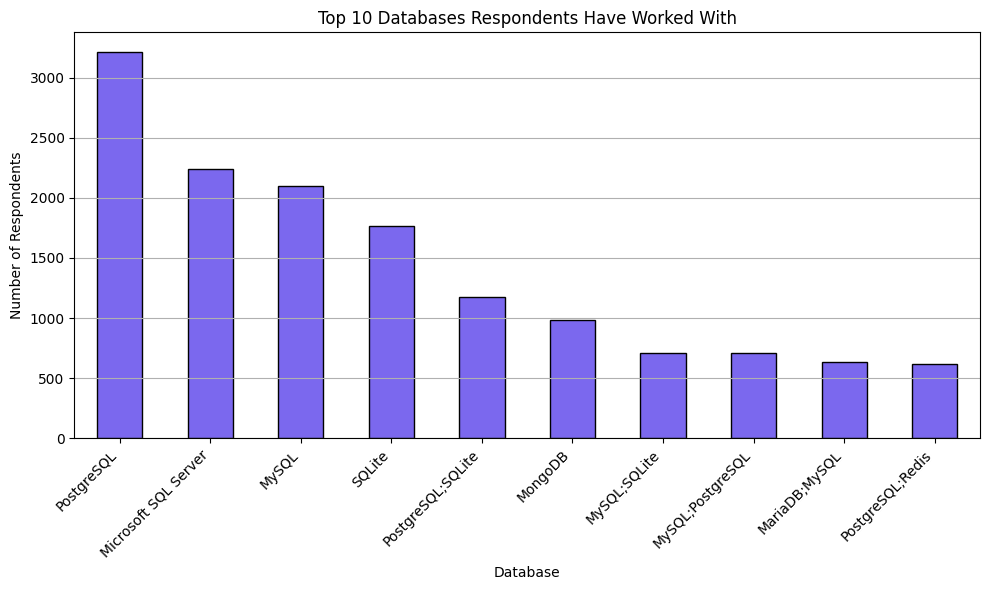

In [11]:
# 欠損を除去し、データベースを分割・展開
df_db_have = df[['DatabaseHaveWorkedWith']].dropna()
df_db_have['Database'] = df_db_have['DatabaseHaveWorkedWith'].str.split(',')
df_db_have = df_db_have.explode('Database')
df_db_have['Database'] = df_db_have['Database'].str.strip()

# 上位10個のデータベースを集計
top_dbs = df_db_have['Database'].value_counts().head(10)

# 縦棒グラフで可視化
plt.figure(figsize=(10, 6))
top_dbs.plot(kind='bar', color='mediumslateblue', edgecolor='black')

# グラフ装飾
plt.title('Top 10 Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_896/553859067.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_income = df_age_income.groupby('Age')['ConvertedCompYearly'].median().reset_index()


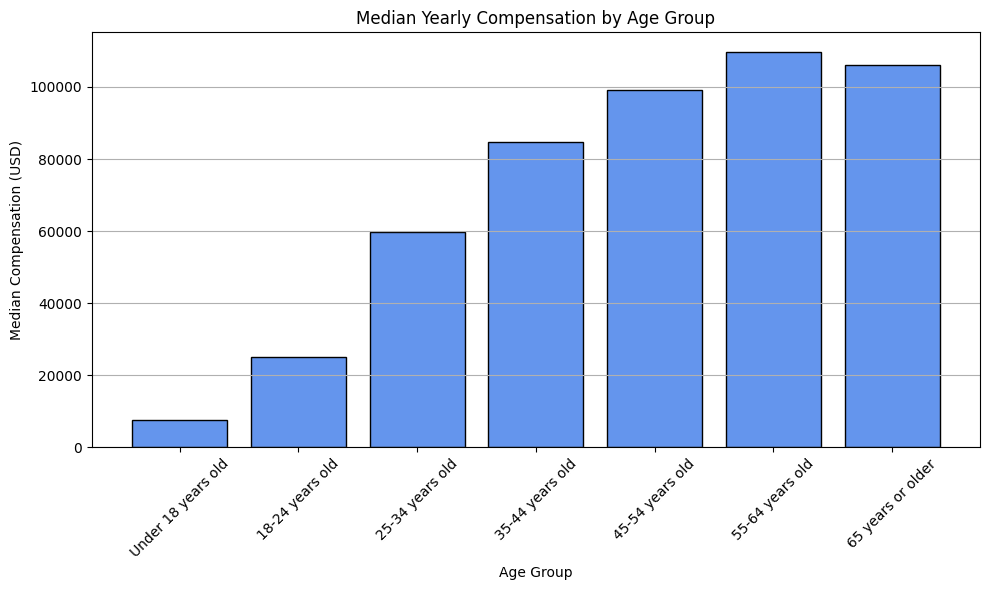

In [12]:
# 対象カラムを抽出し、欠損除去
df_age_income = df[['Age', 'ConvertedCompYearly']].dropna()
df_age_income['ConvertedCompYearly'] = pd.to_numeric(df_age_income['ConvertedCompYearly'], errors='coerce')
df_age_income = df_age_income.dropna()

# 年齢カテゴリの順序を指定
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_age_income = df_age_income[df_age_income['Age'].isin(age_order)]
df_age_income['Age'] = pd.Categorical(df_age_income['Age'], categories=age_order, ordered=True)

# 年齢グループごとの中央値を算出
grouped_income = df_age_income.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# グループ化棒グラフの描画（1グループのみのため単純棒グラフ）
plt.figure(figsize=(10, 6))
plt.bar(grouped_income['Age'], grouped_income['ConvertedCompYearly'],
        color='cornflowerblue', edgecolor='black')

# グラフ装飾
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



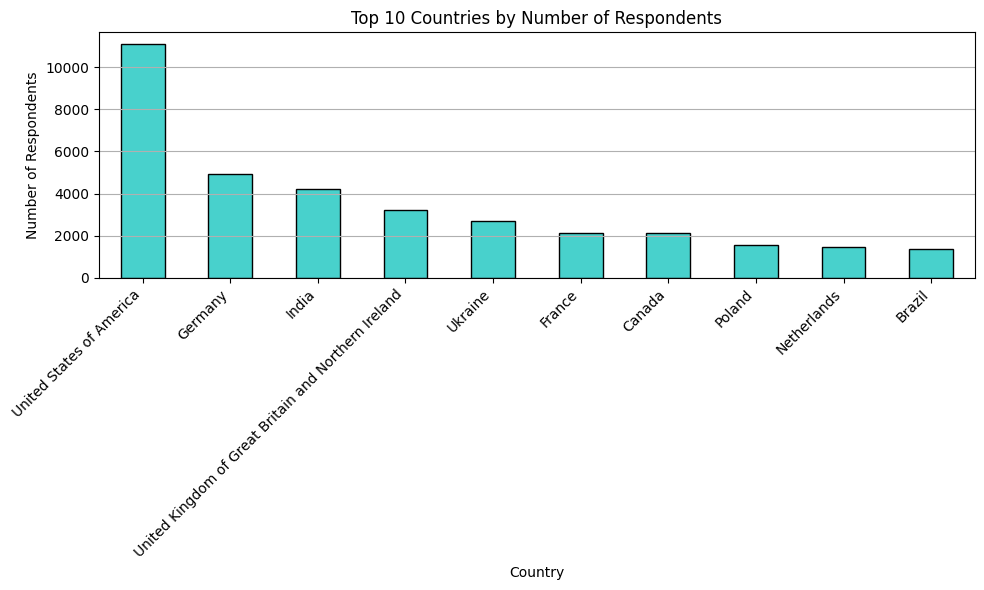

In [13]:
# Country 列の欠損を除去
df_country = df[['Country']].dropna()

# 回答者数を集計し、上位10カ国に限定
top_countries = df_country['Country'].value_counts().head(10)

# 棒グラフを描画
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='mediumturquoise', edgecolor='black')

# グラフ装飾
plt.title('Top 10 Countries by Number of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
